In [1]:
using Plots
using LaTeXStrings
using Symbolics
using SymbolicNumericIntegration
using DifferentialEquations

# Lucas Schmidt Ferreira de Araujo

# List 03 - Pertubation Methods

## Problem 01

We have the problem

$$ y' = 1 + \alpha y^2 , \quad \alpha = 1 + \epsilon$$

$$ y(0) = 1$$

### Analytical Solution

We can find the solution by the separation of variables

$$ \int \frac{dy}{1 + \alpha y^2} = \int dx $$

$$ \frac{1}{\sqrt{\alpha}} (arctg(\sqrt{\alpha} y) +C) = x $$

$$ y = \frac{1}{\sqrt{\alpha}}tg(\sqrt{\alpha} x + C) $$ 

From I.C, we have

$$ 1 = \frac{tg(C)}{\sqrt{\alpha}} \implies C = arctg(\sqrt{\alpha})$$

### Approximation

A three term solution is given by

$$ y(x) = y_0(x) + \epsilon y_1(x) + \epsilon^2 y_2(x) $$

Then we have

$$ y_0'(x) + \epsilon y_1'(x) + \epsilon^2 y_2'(x) = 1 + (1+\epsilon)( y_0(x) + \epsilon y_1(x) + \epsilon^2 y_2(x) )^2  $$

The initial condtion is given by

$$ y(0) = 1 = y_0(x) + \epsilon y_1(0) + \epsilon^2 y_2(0) \implies y_0(0) = 1 , \quad y_1(0) = y_2(0) = 0 $$

In [2]:
@variables x , ϵ 
@variables y0(x) , y1(x) , y2(x)
D = Differential(x)

yappr = y0 + y1*ϵ + y2*ϵ^2
eqL = D( yappr )|> expand_derivatives
eqR = 1 + (1+ϵ) * (yappr)^2 

eq = eqL - expand(eqR)
expand(eq)

-1 + Differential(x)(y0(x)) - (y0(x)^2) + Differential(x)(y1(x))*ϵ - (y0(x)^2)*ϵ - 2y0(x)*y1(x)*ϵ + Differential(x)(y2(x))*(ϵ^2) - 2y0(x)*y2(x)*(ϵ^2) - 2y0(x)*y1(x)*(ϵ^2) - (y1(x)^2)*(ϵ^2) - 2y0(x)*y2(x)*(ϵ^3) - 2y2(x)*y1(x)*(ϵ^3) - (y1(x)^2)*(ϵ^3) - (y2(x)^2)*(ϵ^4) - 2y2(x)*y1(x)*(ϵ^4) - (y2(x)^2)*(ϵ^5)

### $\epsilon^0$

$$ y_0'(x) = 1 + y_0(x)^2 $$

$$ y_0(0) = 1$$

The solution is

$$ y_0(x) = tg(x + \frac{\pi}{4})$$

### $\epsilon^1$

In [3]:
Symbolics.coeff(eq , ϵ^1)

Differential(x)(y1(x)) - (y0(x)^2) - 2y0(x)*y1(x)

$$ y_1' - 2y_0 y_1 = y_0^2 $$

$$ y_1(0) = 0$$

The solution is 

$$ \mu_1(x) = exp( \int -2y_0(x)dx ) = exp(2 ln(cos(x+\frac{\pi}{4})) ) = cos(x+\pi/4)^{2}$$

$$ y_1(x) = \mu_1(x)^{-1} (\int \mu_1(x) y_0(x)^2 dx + C) $$

In [4]:
Symbolics.coeff(eq , ϵ^2)

Differential(x)(y2(x)) - 2y0(x)*y2(x) - 2y0(x)*y1(x) - (y1(x)^2)

$$ y_2' - 2y_0 y_2 = 2y_0 y_1 + y_1^2 $$
$$ y_2(0) = 0$$



The solution is

$$ \mu_2(x) = exp( \int -2y_0(x)dx ) = cos(x+\pi/4)^{2} $$

$$ y_2(x) = \mu_2(x)^{-1}( \int \mu(x) (2y_0 y_1 + y_1^2) dx + C )$$

In [3]:
@variables x
y0 = tan(x + π / 4)
mu1 = cos(x + π/4)^2
integral1 = integrate(mu1 * y0^2,x)[1]
C1 = substitute( -integral1 , x=>0)
y1 = (integral1 + C1 ) / mu1

mu2 = cos(x + π/4)^2
integral2 = integrate( (2*y0*y1 + y1^2)*mu2,x)[2]
C2 = substitute( -integral2 , x=>0)
y2 = (integral2 + C2 ) / mu2

((0.7071067811865476x*sin(x) + 0.7071067811865475x*cos(x)) / (-0.7071067811865475sin(x) + 0.7071067811865476cos(x)) + 0.4999999999999999(sin(x)^2)*(((0.25 + 0.5x + 0.25(sin(x)^2) - 1.1102230246251565e-16sin(x)*cos(x) - 0.25(cos(x)^2)) / (0.4999999999999999(sin(x)^2) - sin(x)*cos(x) + 0.5000000000000001(cos(x)^2)))^2) - sin(x)*cos(x)*(((0.25 + 0.5x + 0.25(sin(x)^2) - 1.1102230246251565e-16sin(x)*cos(x) - 0.25(cos(x)^2)) / (0.4999999999999999(sin(x)^2) - sin(x)*cos(x) + 0.5000000000000001(cos(x)^2)))^2) + 0.5000000000000001(cos(x)^2)*(((0.25 + 0.5x + 0.25(sin(x)^2) - 1.1102230246251565e-16sin(x)*cos(x) - 0.25(cos(x)^2)) / (0.4999999999999999(sin(x)^2) - sin(x)*cos(x) + 0.5000000000000001(cos(x)^2)))^2)) / (cos(0.7853981633974483 + x)^2)

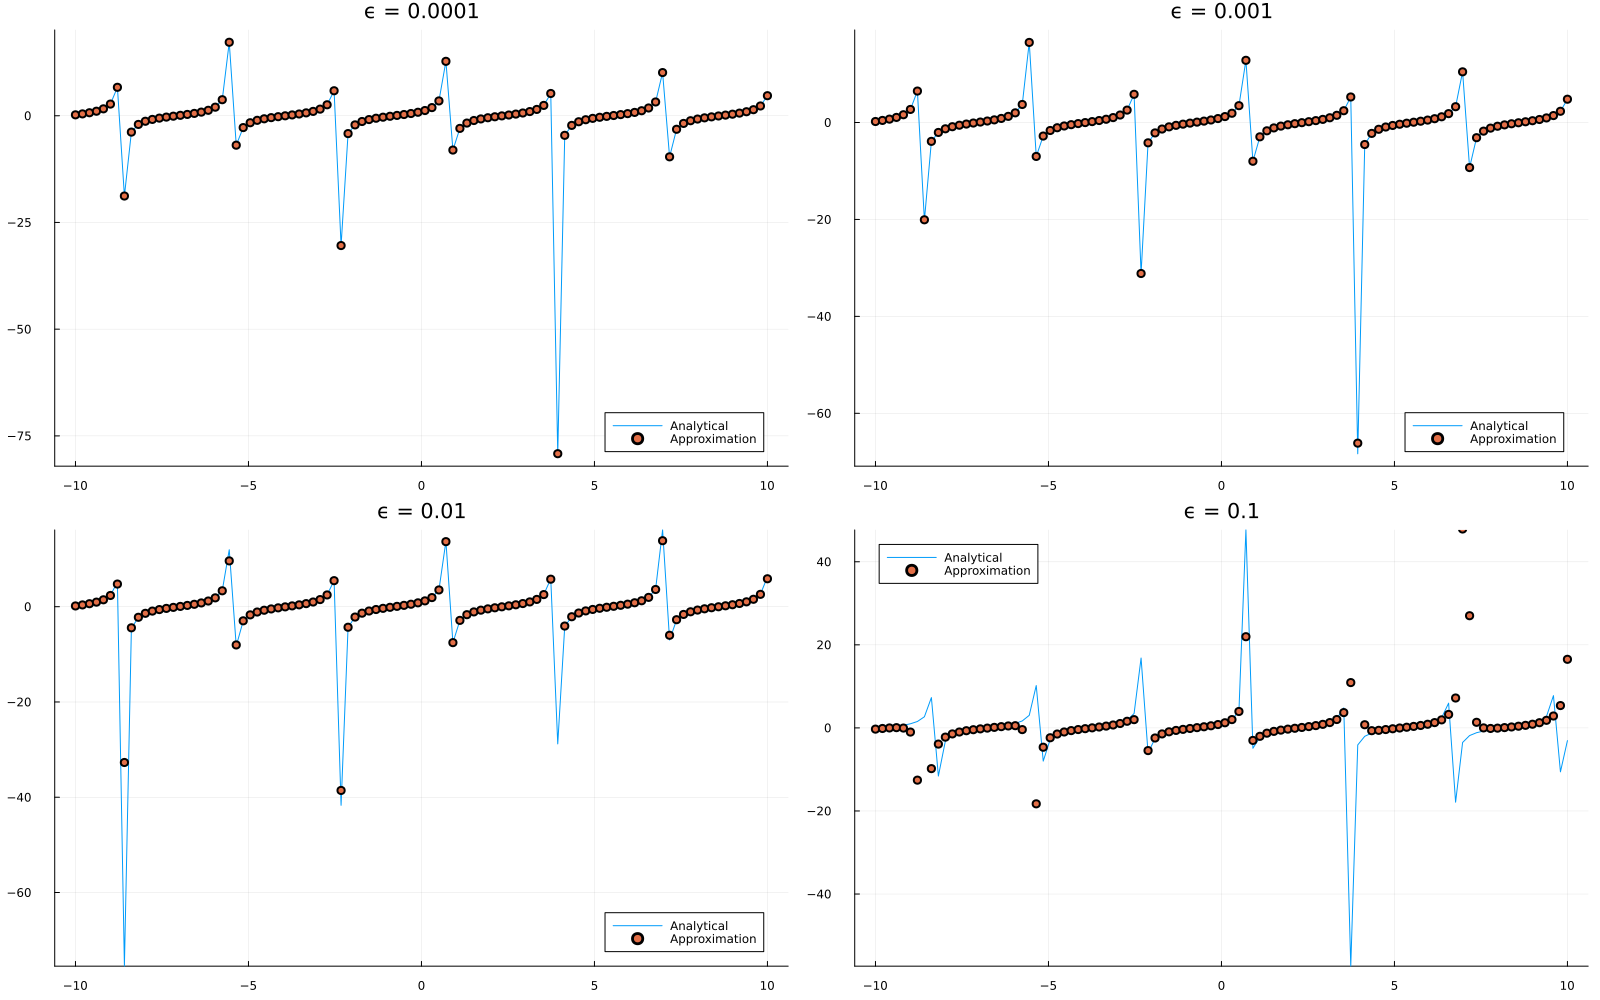

In [6]:
### Functions

### Analytical Solution
function y_analytic(x,ϵ)
    α = 1 + ϵ
    C = atan(√α)
    return tan(√α * x + C) / √α
end 

function y_approx(_x,ϵ)
    return Symbolics.value( substitute(y0 , x=>_x) ) + ϵ * Symbolics.value( substitute(y1 , x=>_x) ) #+ ϵ^2 * Symbolics.value( substitute(y2,x=>_x) )
end

ϵ1 = .0001
ϵ2 = .001
ϵ3 = .01
ϵ4 = .1

x_ = range(-10,10,100)
p1 = plot( x_, y_analytic.(x_,ϵ1) , label = "Analytical" , title = "ϵ = $(ϵ1)" )
scatter!(x_, y_approx.(x_,ϵ1) , label = "Approximation" )

p2 = plot( x_, y_analytic.(x_,ϵ2) , label = "Analytical" , title = "ϵ = $(ϵ2)" )
scatter!(x_, y_approx.(x_,ϵ2) , label = "Approximation" )

p3 = plot( x_, y_analytic.(x_,ϵ3) , label = "Analytical" , title = "ϵ = $(ϵ3)" , ylims=( minimum(y_analytic.(x_,ϵ3)) , maximum(y_analytic.(x_,ϵ3)) ))
scatter!(x_, y_approx.(x_,ϵ3) , label = "Approximation" )

p4 = plot( x_, y_analytic.(x_,ϵ4) , label = "Analytical" , title = "ϵ = $(ϵ4)" , ylims=( minimum(y_analytic.(x_,ϵ4)) , maximum(y_analytic.(x_,ϵ4)) ) )
scatter!(x_, y_approx.(x_,ϵ4) , label = "Approximation" )

plot(p1,p2,p3,p4 ,size = (1600,1000))

## Problem 02

We have the Bernoulli problem

$$ y' = -y + \epsilon y^2 $$

$$ y(0) = 1 $$

### Analytical Solution

If we substitute 

$$ u = y^{-1} $$

we have the transformation

$$ -u' + u = \epsilon $$

$$ u(0) = 1$$

The solution is

$$ u(x) = exp(x) (exp(-x) \epsilon + C) $$

From I.C

$$ 1 = \epsilon + C \implies C = 1- \epsilon $$

Then

$$ y(x) = \frac{1}{\epsilon + (1-\epsilon)e^x} $$

### Approximation

A three term solution is given by

$$ y(x) = y_0(x) + \epsilon y_1(x) + \epsilon^2 y_2(x) $$

The initial condition read as:

$$ 1 =  y_0(0) + \epsilon y_1(0) + \epsilon^2 y_2(0) , \implies y_0 = 1 , \quad y_1 = y_2 = 0 $$

In [7]:
@variables x , ϵ 
@variables y0(x) , y1(x) , y2(x)
D = Differential(x)

yappr = y0 + y1*ϵ + y2*ϵ^2
eqL = D( yappr )|> expand_derivatives
eqR = -yappr + ϵ*yappr^2

eq = eqL - expand(eqR)
expand(eq)

y0(x) + Differential(x)(y0(x)) + Differential(x)(y1(x))*ϵ + y1(x)*ϵ - (y0(x)^2)*ϵ + Differential(x)(y2(x))*(ϵ^2) + y2(x)*(ϵ^2) - 2y0(x)*y1(x)*(ϵ^2) - 2y0(x)*y2(x)*(ϵ^3) - (y1(x)^2)*(ϵ^3) - 2y2(x)*y1(x)*(ϵ^4) - (y2(x)^2)*(ϵ^5)

### $\epsilon^0$

$$ y_0' + y_0 = 0 $$

$$ y_0(0) = 1 $$

$$ y_0(x) = e^{-x} $$

### $\epsilon^1$

In [8]:
Symbolics.coeff(eq , ϵ^1)

Differential(x)(y1(x)) + y1(x) - (y0(x)^2)

$$ y_1' + y_1 = y_0^2 $$
$$ y_1(0) = 0$$
$$ y_1(x) = e^{-x} - e^{-2x} $$

### $\epsilon^2$

In [9]:
Symbolics.coeff(eq , ϵ^2)

Differential(x)(y2(x)) + y2(x) - 2y0(x)*y1(x)

$$ y_2' + y_2 = 2y_0 y_1 $$

$$ y_2(x) = 0 $$

$$ y_2(x) = e^{-x} - 2 e^{-2x} + e^{-3x}$$

Then

$$ y_{\text{approx}} = e^{-x} + \epsilon(e^{-x} - e^{-2x}) + \epsilon^2 (e^{-x} - 2 e^{-2x} + e^{-3x}) $$

### Error Estimation

The error estimation can be given by the inequality

$$ || R || \leq \frac{ \epsilon^2 LM}{ \alpha + \epsilon L} ( e^{(\alpha + \epsilon L)t} - 1 ) $$

where 
$$M = max_{x\in [0,X]} y_1(x)$$

We have

$$ y_1'(x_M) = -e^{-x_M} + 2e^{-2x_M} = 0 \implies x_M = ln(2) \implies M = \frac{1}{4}$$

Also L is the Liphsitz constant. That is

$$ |y(x_1)^2 - y(x_2)^2| = (y(x_1)+ y(x_2))(y(x_1) - y(x_2)) \leq 2(y_a - y_b) max_{y \in [y(0),y(X)]}y $$

From the analytical solution, we know that $max_{y \in [y(0),y(X)]}y=1 , \implies L=2$

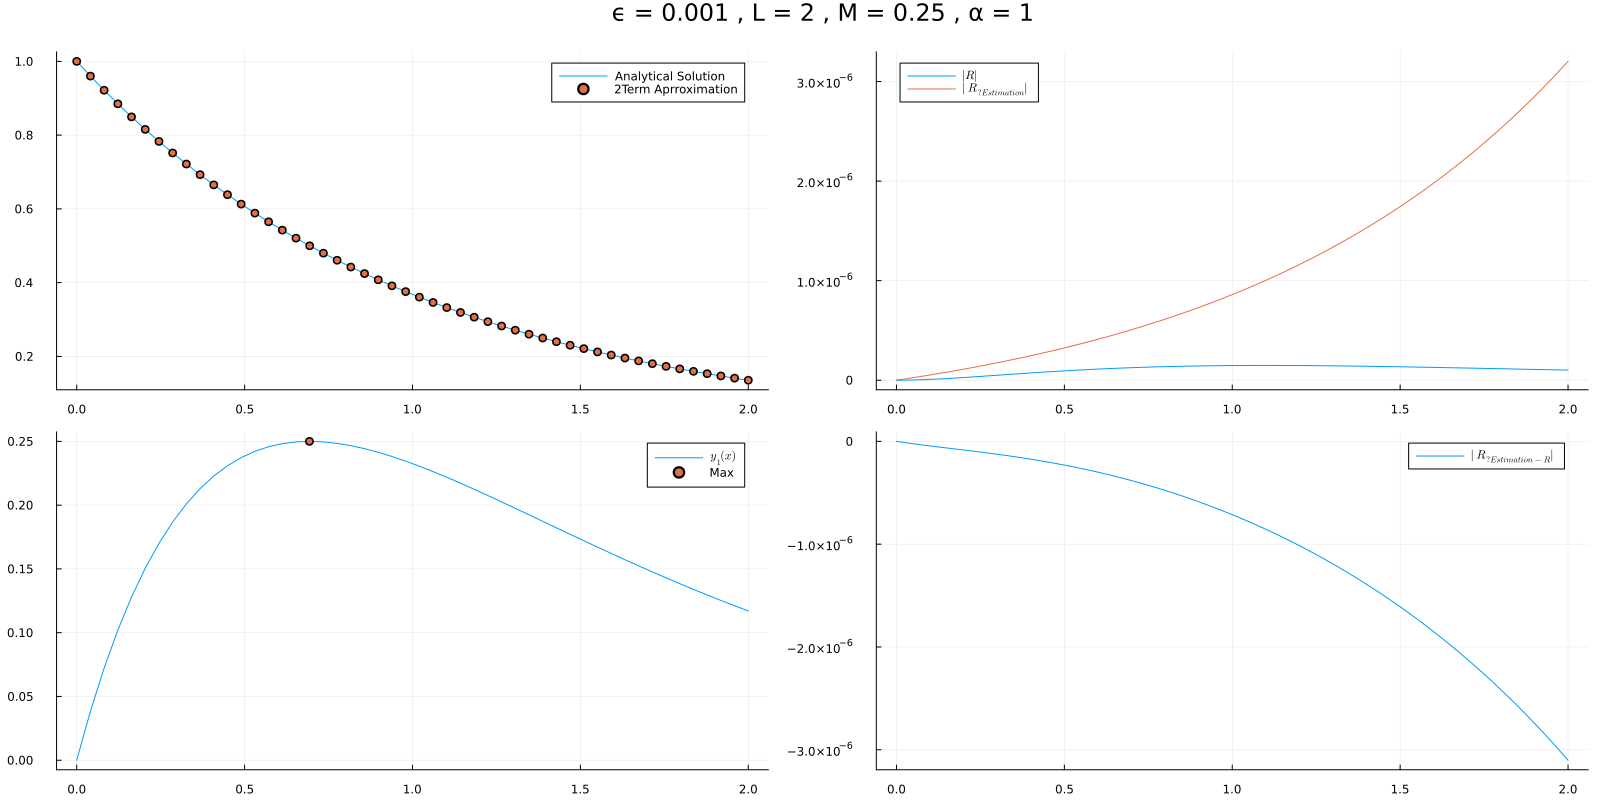

In [10]:
function y_analytic(x,ϵ)
    return 1 / (ϵ + (1-ϵ) * exp(x) )
end


function y_approx(x,ϵ)
    return exp(-x) + ϵ * ( exp(-x) - exp(-2*x) ) #+ ϵ^2 * (exp(-x) - 2*exp(-2x) + exp(-3*x))
end
ϵ = 0.001
x_ = range(0,2,50)
M = 1/4
L = 2
α = abs(-1)
R = ϵ^2 .* L .* M .* (exp.( (α + ϵ * L).*x_ ) .- 1) ./ (α + ϵ * L)

p1 = plot( x_ , y_analytic.(x_,ϵ) , label = "Analytical Solution")
scatter!( x_ , y_approx.(x_,ϵ) , label = "2Term Aprroximation")

p2 = plot( x_ , abs.( y_approx.(x_,ϵ) - y_analytic.(x_,ϵ ) ) , label = L"|R|")
plot!(x_ , R , label = L"|R_{\text{Estimation}}|")

p3 = plot( x_ , exp.(-x_) - exp.(-2*x_) , label = L"y_1(x)" )
scatter!( [log(2)] , [M] , label = "Max")


p4 = plot(x_ , abs.( y_approx.(x_,ϵ) - y_analytic.(x_,ϵ )) .- R , label = L" | R_{\text{Estimation} - R} |" )
plot(p1,p2,p3,p4 , size = (1600,800) , suptitle = "ϵ = $(ϵ) , L = $(L) , M = $(M) , α = $(α)")

## Problem 03

We have the problem

$$ y'' + (1+\epsilon)y = 0, \quad 0 < \epsilon << 1 $$

$$ y(0) = 1 , \quad y'(0) = 0 $$

### Analical Solution

The solution is of the kind

$$ y(x) = C_1 cos(x \sqrt{1+\epsilon}) + C_2 sin( x \sqrt{1+\epsilon} ) $$

From B.C. have , $C_1 = 1 \quad C_2 = 0$. Then

$$ y(x) =  cos(x \sqrt{1+\epsilon}) $$

### Approximation

A two-term approximation has the form

$$ y(x) = y_0(x) + \epsilon y_1(x) $$

The B.C read as

$$ y(0) =  y_0(0) + \epsilon y_1(0) = 1 \implies y_0(0) = 1 , y_1(0) = 0  $$

$$ y'(0) = y_0'(0) + \epsilon y_1'(0) = 0 \implies  y_0'(0) = 0 , y_1'(0) = 0 $$

Applying the substitution, we have

$$y_0'' + y_0 + \epsilon( y_1'' +  y_1 + y_0) + \epsilon^2 y_1 = 0 $$

### $\epsilon^0$

$$ y''_0 + y_0 = 0 $$

$$ y_0(0) = 1 ,\quad  y'_0(0) = 0 $$

The solution is

$$ y_0(x) = cos(x) $$

### $\epsilon^1$

$$ y_1'' +  y_1  = - y_0$$

$$ y_1(0) = y_1'(0) = 0 $$

The solution is given by

$$ y_1(x) = y_1^{p}(x) + y_1^{h}(x) $$

A particular solution is 

$$ y_1^{p}(x) = \frac{1}{2} x sin(x) $$

The homogenous solution is 

$$ y_1^{h}(x) = Asin(x) + B cos(x) $$

From B.C. $A = B = 0$. Then 

$$ y_1(x) = \frac{1}{2} xsin(x) $$

We have the approximation

$$ y(x) = cos(x) + \frac{1}{2} x \epsilon sin(x) , \quad  y(x) \rightarrow \infty , x \rightarrow \infty $$

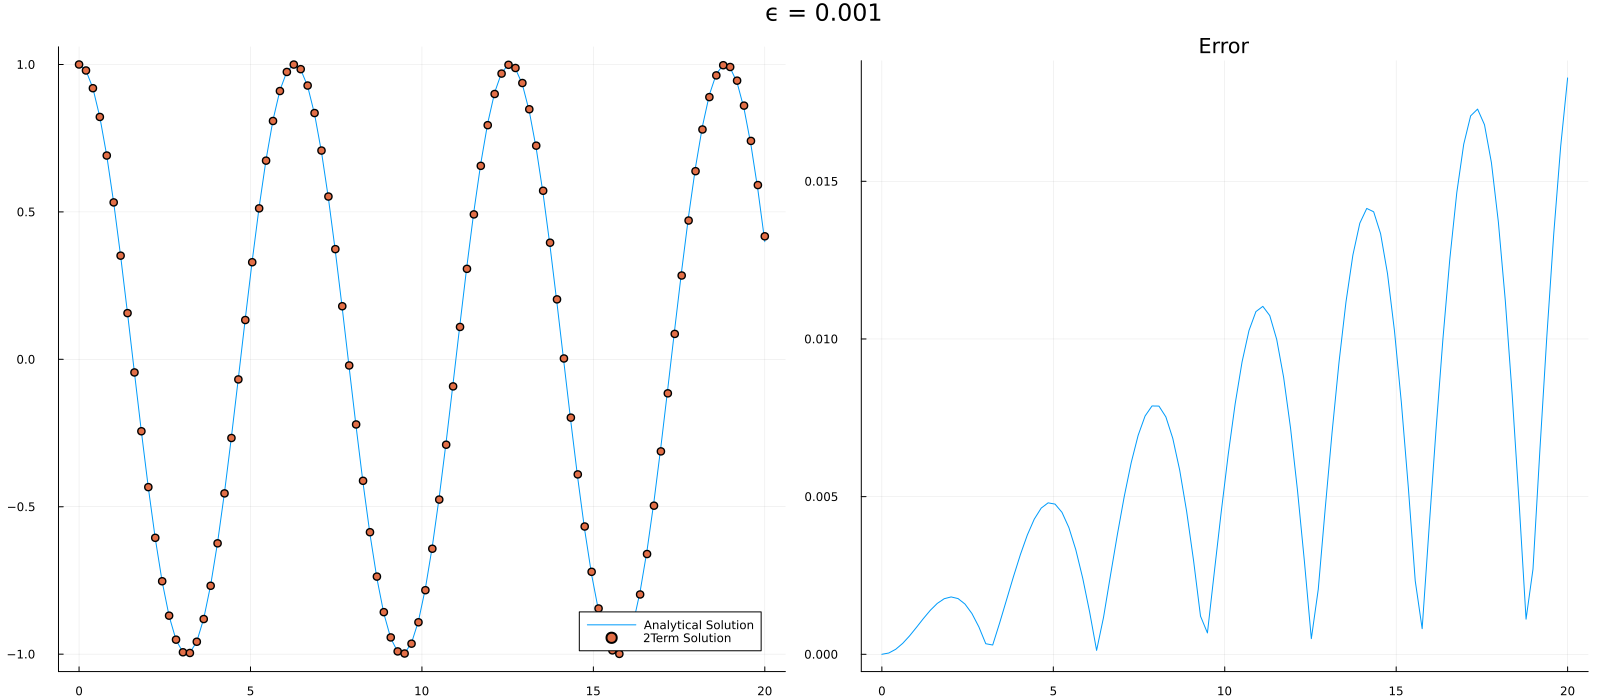

In [15]:
function y_analytic(x,ϵ)
    return cos(x*(1+ϵ)^(.5))
end


function y_approx(x,ϵ)
    return cos(x) + .5 * ϵ * x * sin(x)
end

ϵ = 0.001
x_ = range(0,20,100)
err = abs.( y_analytic.(x_,ϵ) .- y_approx.(x_ , ϵ) )

p1 = plot( x_ , y_analytic.(x_,ϵ)  , label = "Analytical Solution")
scatter!( x_ , y_approx.(x_ , ϵ) , label = "2Term Solution" )

p2 = plot(x_ , err , label = false , title = "Error")
plot(p1,p2 , size = (1600,700) , suptitle = "ϵ = $(ϵ)")

## Problem 04

The scaled pendulum problem is

$$ y'' + \frac{ sin(\epsilon y) }{\epsilon} = 0$$

$$ y(0) = 1, \quad y'(0) = 0$$

For small values of $\epsilon y$, we can write

$$ sin(\epsilon y) = \epsilon y - \frac{\epsilon^3 y^3}{3!} + O(5) $$

Then we have

$$ y'' + \frac{1}{\epsilon}( \epsilon y - \frac{\epsilon^3 y^3}{3!} ) = 0 $$

$$ y'' + y - \delta y^3 = 0 , \quad \delta = \frac{\epsilon^2}{6}$$

$$ y(0) = 1, \quad y'(0) = 0$$

A two-term approximate solution is 

$$ y(x) = y_0(x) + \epsilon y_1(x) $$

The I.C. reads as

$$ y_0(0) + \epsilon y_1(0) = 1 \implies y_0(0) = 1 ,\quad y_1(0) = 0 $$
$$ y_0'(0) + \epsilon y_1'(0) = 0 \implies y_0'(0) = 0 ,\quad y_1'(0) = 0 $$

In [12]:
@variables x , δ 
@variables y0(x) , y1(x)
D = Differential(x)

yappr = y0 + y1*δ 
eqL = D( yappr )|> expand_derivatives
eqR = δ*yappr^3 - yappr

eq = eqL - expand(eqR)
expand(eq)

y0(x) + Differential(x)(y0(x)) + Differential(x)(y1(x))*δ + y1(x)*δ - (y0(x)^3)*δ - 3(y0(x)^2)*y1(x)*(δ^2) - 3y0(x)*(y1(x)^2)*(δ^3) - (y1(x)^3)*(δ^4)

### $\epsilon^0$

$$ y''_0 + y_0(x) = 0 $$

$$ y_0(0) = 1, \quad y_0'(0) = 0 $$

The solution is

$$ y_0(x) = cos(x) $$

### $\epsilon^1$

In [13]:
Symbolics.coeff(eq , δ^1)

Differential(x)(y1(x)) + y1(x) - (y0(x)^3)

$$ y_1'' + y_1 = y_0^3 $$
$$ y_1(0) = 0 , \quad y_1'(0) = 0$$

The solution is given by

$$ y_1(x) = y_1^{(p)}(x) + y_1^{(h)}(x) $$

where $y_1^{(p)}(x) , y_1^{(h)}(x)$ are a particular and the homogenoues solution. Then:

$$ y_1(x) = C_1 cos(x) + C_2 sin(x) + \frac{1}{32} cos(3x) - \frac{3}{8} xsin(x) $$

From initial conditions, we find

$$ y_1(x) = \frac{1}{32} ( cos(3x) - cos(x) ) - \frac{3}{8} x sin(x) $$

Then

$$ y(x) = cos(x) - \epsilon(\frac{1}{32} (cos(3x) - cos(x) - \frac{3}{8} x sin(x) )) $$

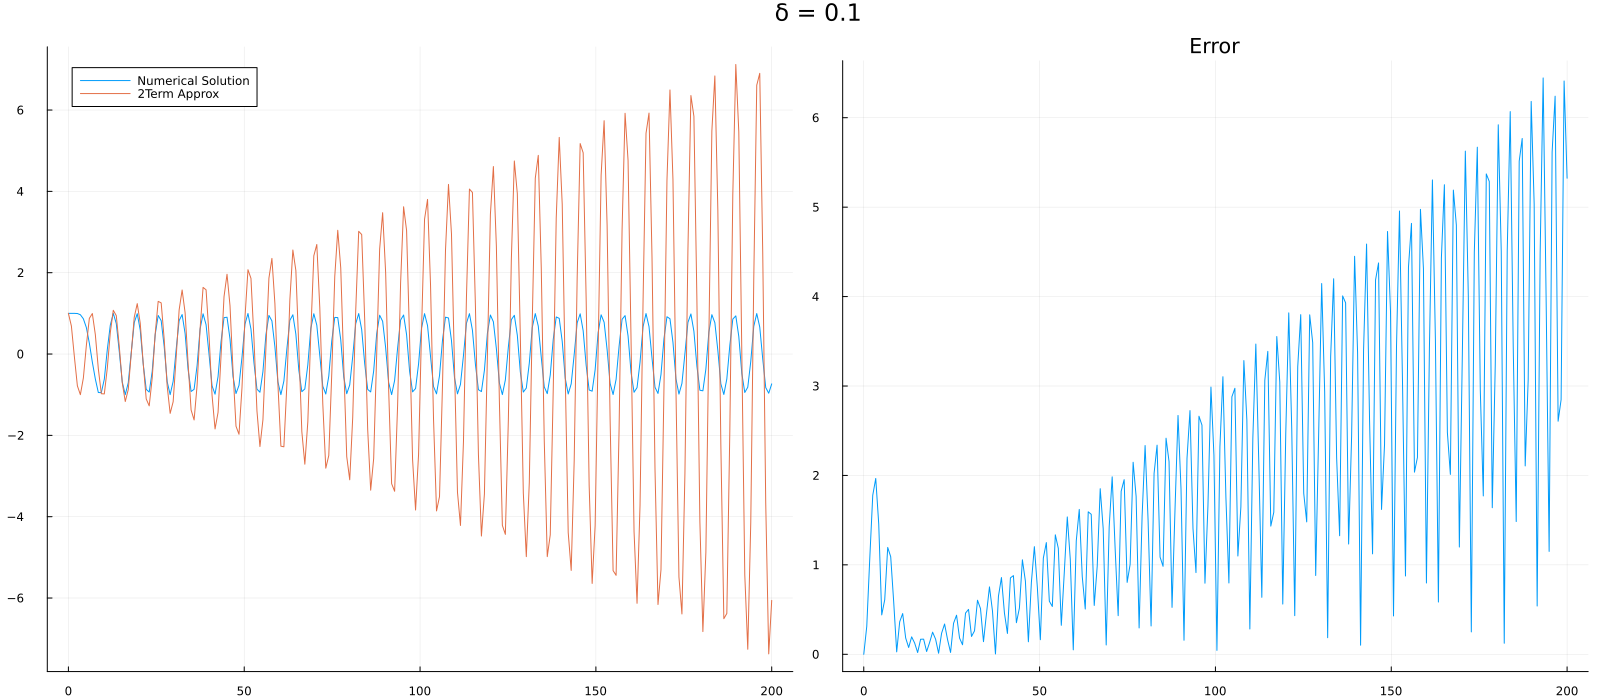

In [10]:
function y_approx(x,ϵ)
    return cos(x) + ϵ * ( (cos(x) - cos(3*x) )/4 + 3*x*sin(x) ) / 8
end

function y_numerical(du, u, δ, t)
    du[1] = u[2]             
    du[2] = -u[1] + δ * u[1]^3
end

δ = 0.1
u0 = [1.0, 0.0]
xspan = (0.0, 200.0)
prob = ODEProblem(y_numerical, u0, xspan ,δ)
sol = solve(prob)
y_num = [q[1] for q in sol.u]

x_ = range(xspan[1],xspan[2],length(y_num))

p1 = plot( x_ ,  y_num  , label = "Numerical Solution" )
plot!( x_ , y_approx.(x_,δ) , label = "2Term Approx" )

p2 = plot( x_ ,  abs.( y_num .- y_approx.(x_,δ) )  , label = false , title = "Error" )
plot(p1, p2 , size = (1600,700) , suptitle = "δ = $(δ)")


## Problem 05

We have the equation

$$ y'' + y - \epsilon y^3 = 0 $$

$$ y(0) = 1, \quad y'(0) = 0$$

The ide of Poincare-Lindsted method is to supose a solution of the form

$$ y(t) = y_0(\tau) + \epsilon y_1(\tau) , \quad \tau = \omega t , \quad \omega = \omega_0 + \epsilon \omega_1 $$

The initial condition reads as

$$ y(0) = y_0(0) + \epsilon y_1(0) \implies y_0(0) = 1 , \quad y_1(0) = 0$$

$$ \omega y'(0) =   y_0'(0) + \epsilon y_1'(0) \implies  y_0'(0) =  y_1'(0) = 0 $$

also

$$ \frac{dy}{dt} = \frac{dy}{d\tau} \frac{d\tau}{dt} = \frac{dy}{d\tau} \omega \implies \frac{d^2y}{dt^2} =  \frac{d^2y}{d\tau^2} \omega^2 $$

We have then

$$ \omega^2 y'' + y - \epsilon y^3 = 0 , \quad y' = \frac{dy}{d\tau} $$

$$ y(0) = 1, \quad y'(0) = 0$$

In [9]:
@variables t , ϵ , τ
@variables y0(τ) y1(τ) ω0(τ) ω1(τ)
D = Differential(τ)


y_approx_1 = y0 + y1 * ϵ
ω = ω0 + ω1 * ϵ

eq =  expand( expand_derivatives( y_approx_1 - ϵ * y_approx_1^3 + ω^2 * D(D(y_approx_1)) ) )

y0(τ) + y1(τ)*ϵ + (ω0(τ)^2)*Differential(τ)(Differential(τ)(y0(τ))) + (ω0(τ)^2)*Differential(τ)(Differential(τ)(y1(τ)))*ϵ + 2ω0(τ)*Differential(τ)(Differential(τ)(y0(τ)))*ω1(τ)*ϵ - (y0(τ)^3)*ϵ - 3y1(τ)*(y0(τ)^2)*(ϵ^2) + 2ω0(τ)*Differential(τ)(Differential(τ)(y1(τ)))*ω1(τ)*(ϵ^2) + Differential(τ)(Differential(τ)(y0(τ)))*(ω1(τ)^2)*(ϵ^2) - 3(y1(τ)^2)*y0(τ)*(ϵ^3) + Differential(τ)(Differential(τ)(y1(τ)))*(ω1(τ)^2)*(ϵ^3) - (y1(τ)^3)*(ϵ^4)

### $\epsilon^0$

$$ \omega_0^2 y''_0 + y_0 = 0 $$

$$ y_0(0) = 1 , \quad y_0'(0) = 0 $$

We want $\omega_1 = 1$ since it would give representation of the solution of the unperturbed equation. Again, the solution is

$$ y_0(t) = cos(t) $$

### $\epsilon^1$

In [10]:
Symbolics.coeff(eq , ϵ^1)

y1(τ) + (ω0(τ)^2)*Differential(τ)(Differential(τ)(y1(τ))) + 2ω0(τ)*Differential(τ)(Differential(τ)(y0(τ)))*ω1(τ) - (y0(τ)^3)

$$ y_1'' + y_1 = 2\omega_1 cos(\tau) + cos(\tau)^3 $$

$$ y_1(0) = y_1'(0) = 0 $$

We know that 

$$ cos(\tau)^3 = \frac{3cos(\tau)}{4} + \frac{cos(3\tau)}{4} $$

We have then

$$ y_1'' + y_1 = cos(\tau) (2\omega_1 + \frac{3}{4}) + \frac{1}{4} cos(3\tau) $$

In order to avoid the secular term, we chose $\omega = -\frac{3}{8}$. This leads to an equation with particular solution $y_p = -\frac{1}{32} cos(3\tau)$. Then

$$ y_1(\tau) = c_1 cos(\tau) + c_2 sin(\tau) -  \frac{1}{32} cos(3\tau)$$

From I.C. , we have $c_1 = \frac{1}{32} , c_2 = 0 $. Then final solution is

$$ y_1(\tau) = -\frac{1}{32} ( cos(3\tau) - cos(\tau) )$$

Then

$$ y = cos(\tau) - \frac{\epsilon}{32} ( cos(3\tau) - cos(\tau) ) , \quad \tau = 1 - \frac{3}{8} \epsilon t $$

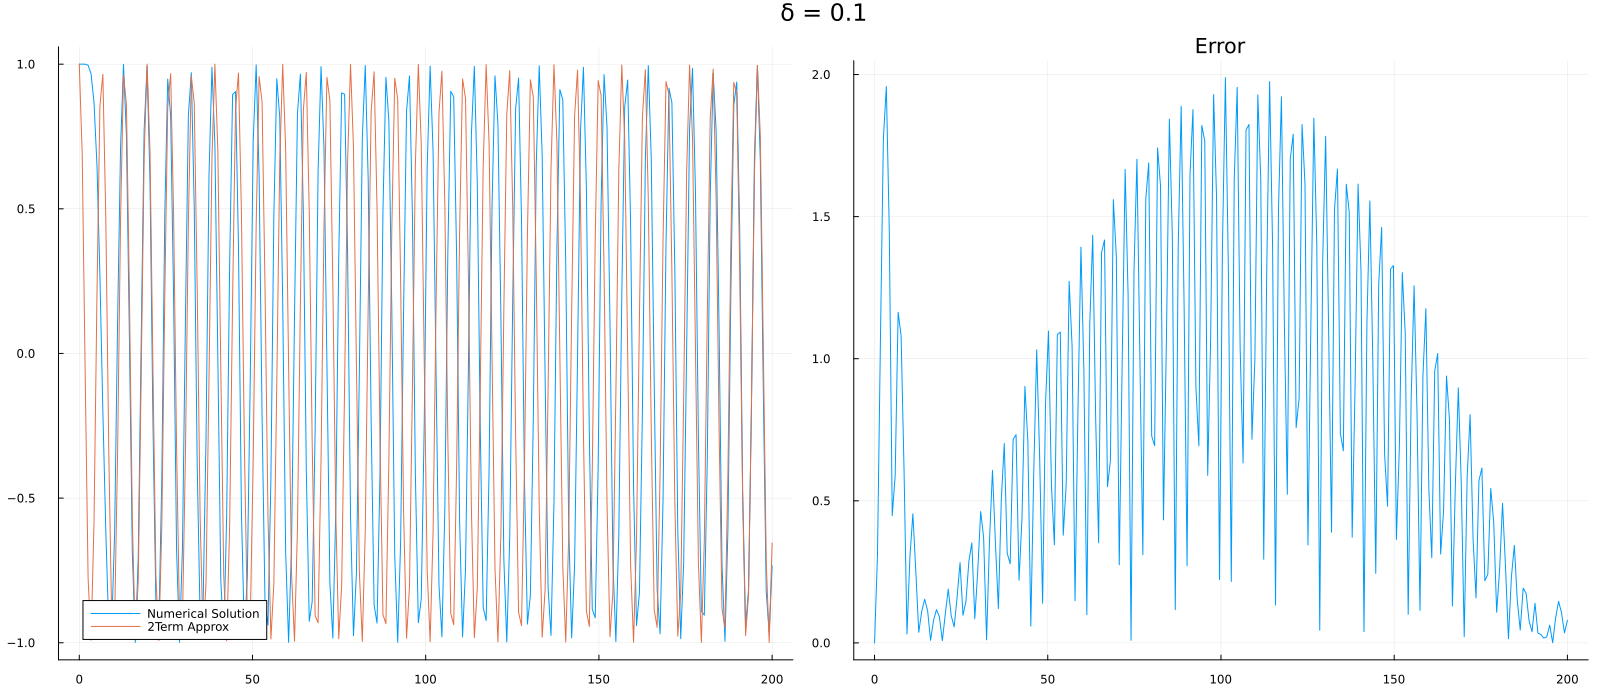

In [12]:
function y_approx(t,ϵ)
    τ = t - 3 * ϵ * t / 8
    return cos(τ) - ϵ * ( cos(3*τ) - cos(τ) ) / 32
end

δ = 0.1
u0 = [1.0, 0.0]
tspan = (0.0, 200.0)
prob = ODEProblem(y_numerical, u0, tspan ,δ)
sol = solve(prob)
y_num = [q[1] for q in sol.u]

t = range(xspan[1],xspan[2],length(y_num))

p1 = plot( t ,  y_num  , label = "Numerical Solution")
plot!( t , y_approx.(x_,δ) , label = "2Term Approx" )

p2 = plot( t , abs.(y_num .- y_approx.(x_,δ)) , title = "Error" , label = false)

plot(p1, p2 , xlabel = L"x" , size = (1600,700) , suptitle = "δ = $(δ)")